Data source: [Stroke Prediction Dataset from Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import visualization as visual

df = pd.read_csv(
    "../../data/raw/healthcare-dataset-stroke-data.csv",
    dtype={
        'gender': 'category',
        'age': 'float64',
        'hypertension': bool,
        'heart_disease': bool,
        'ever_married': bool,
        'work_type': 'category',
        'Residence_type': 'category',
        'avg_glucose_level': 'float64',
        'bmi': 'float64',
        'smoking_status': 'category',
        'stroke': bool
    },
    true_values=["Yes"],
    false_values=["No"],
    na_values=["Unknown"],
)
df.drop(['id'], axis=1, inplace=True)

In [2]:
import warnings

warnings.filterwarnings('ignore', message='The figure layout has changed to tight')

sns.set_theme(style='darkgrid')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   bool    
 3   heart_disease      5110 non-null   bool    
 4   ever_married       5110 non-null   bool    
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     3566 non-null   category
 10  stroke             5110 non-null   bool    
dtypes: bool(4), category(4), float64(3)
memory usage: 160.3 KB


In [4]:
df.sample(5, random_state=42)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4688,Male,31.0,False,False,False,Self-employed,Rural,64.85,23.0,NaN,False
4478,Male,40.0,False,False,True,Self-employed,Rural,65.29,28.3,never smoked,False
3849,Female,8.0,False,False,False,children,Urban,74.42,22.5,NaN,False
4355,Female,79.0,True,False,True,Self-employed,Rural,76.64,19.5,never smoked,False
3826,Female,75.0,False,False,True,Govt_job,Rural,94.77,27.2,never smoked,False


In [14]:
df.describe(include=np.number).round(2)

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [6]:
df.describe(include='category')

,gender,work_type,Residence_type,smoking_status
count,5110,5110,5110,3566
unique,3,5,2,3
top,Female,Private,Urban,never smoked
freq,2994,2925,2596,1892


In [7]:
for col in df.select_dtypes(include=['category']).columns:
    print(f"Unique categories in {col}: {df[col].cat.categories.tolist()}")

Unique categories in gender: ['Female', 'Male', 'Other']
Unique categories in work_type: ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
Unique categories in Residence_type: ['Rural', 'Urban']
Unique categories in smoking_status: ['formerly smoked', 'never smoked', 'smokes']


In [8]:
df.describe(include=bool)

,hypertension,heart_disease,ever_married,stroke
count,5110,5110,5110,5110
unique,2,2,2,2
top,False,False,True,False
freq,4612,4834,3353,4861


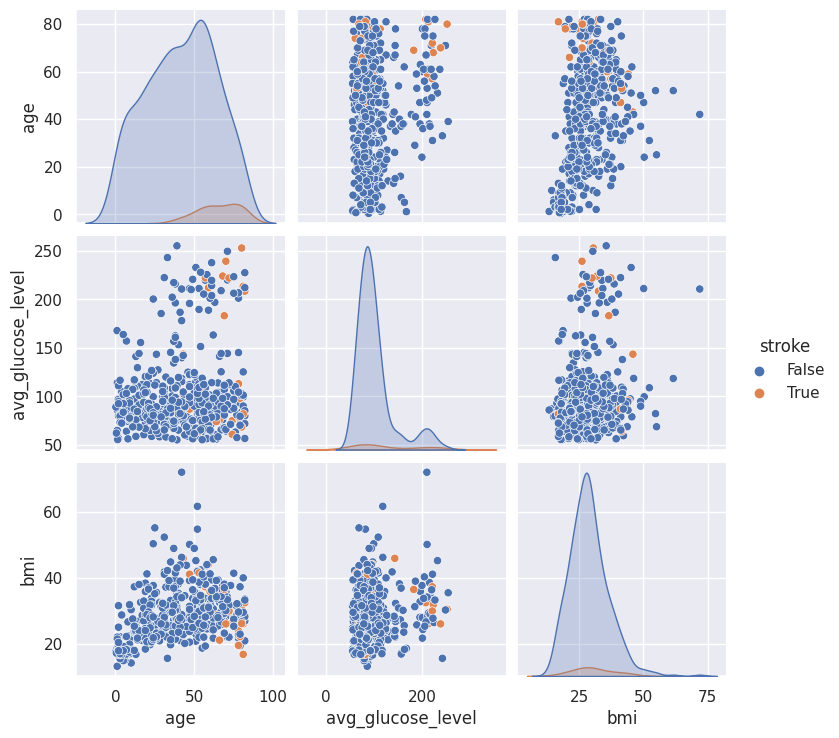

In [9]:
visual.plot_pairplot(df.sample(500, random_state=42), hue_col='stroke')

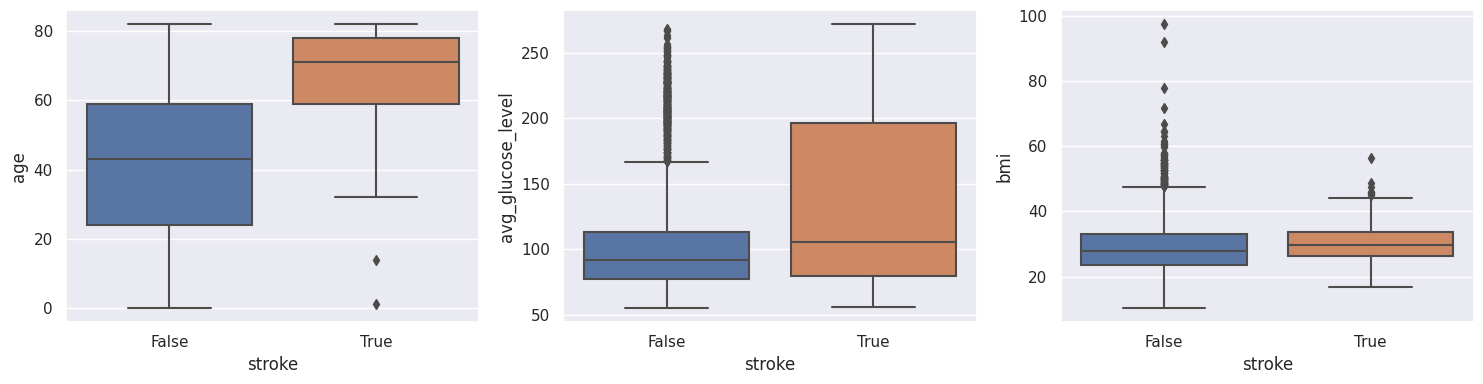

In [10]:
visual.plot_boxplots_by_category(df, x_col='stroke')

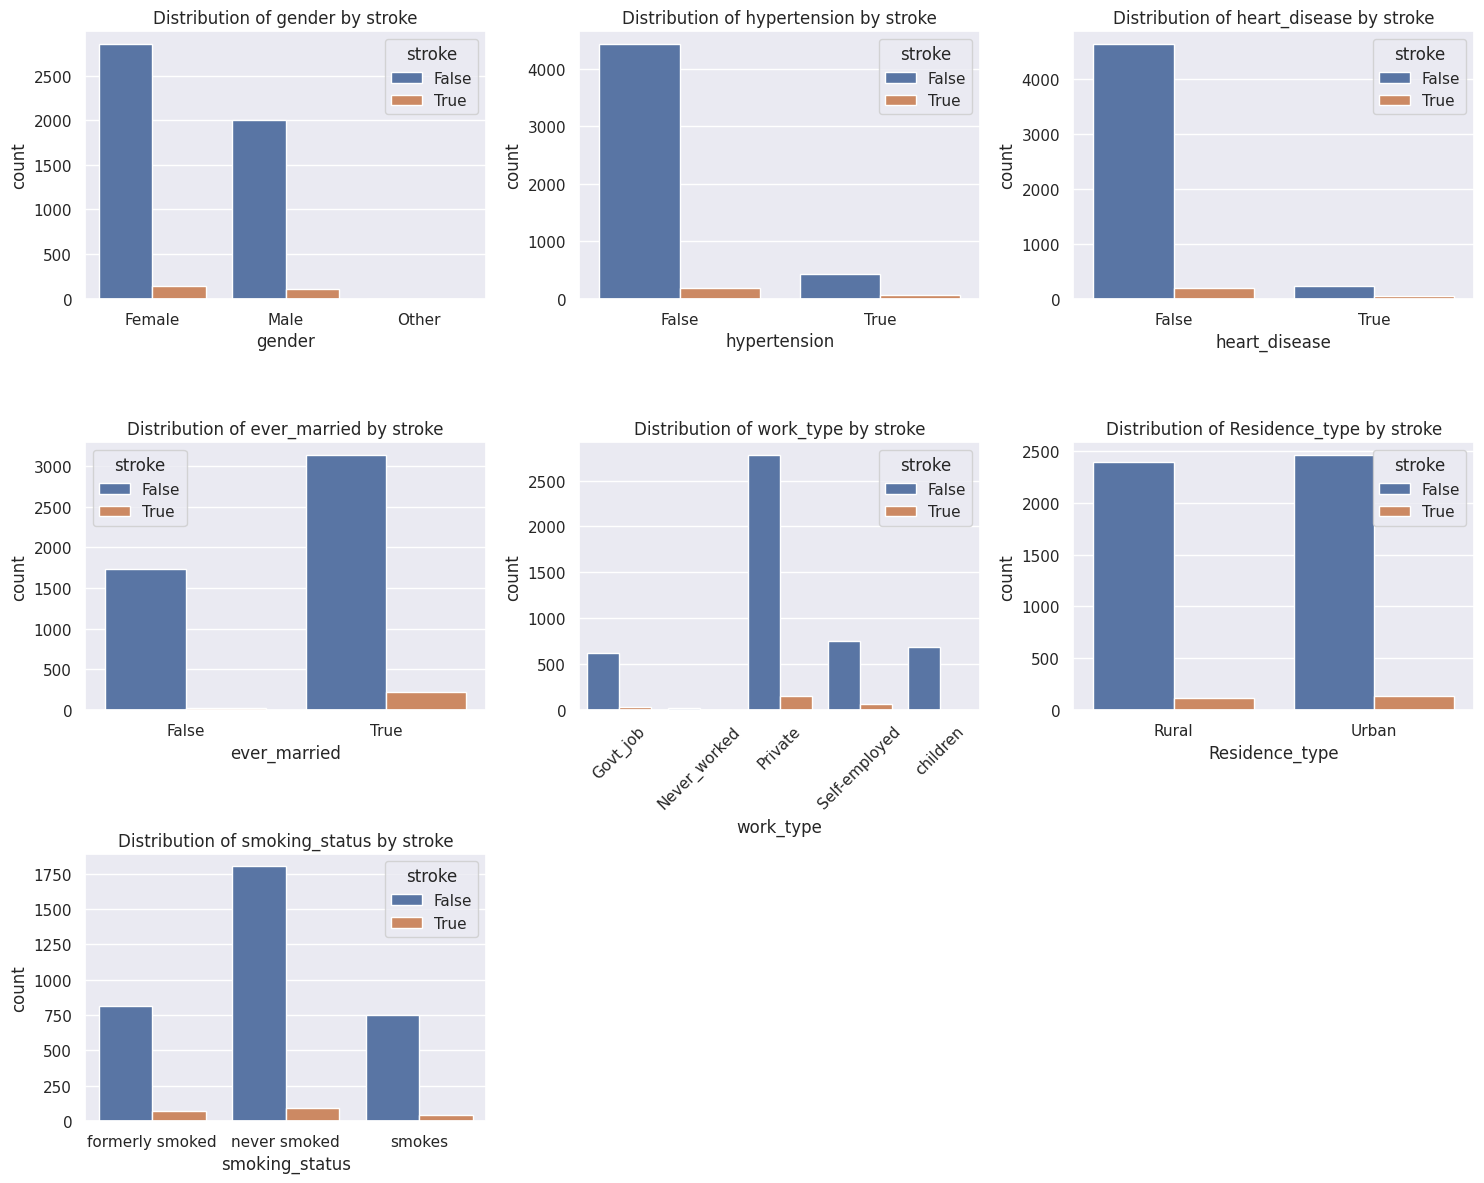

In [11]:
visual.plot_categorical_distributions(df, hue_col='stroke', rotated_xticks_cols=['work_type'])

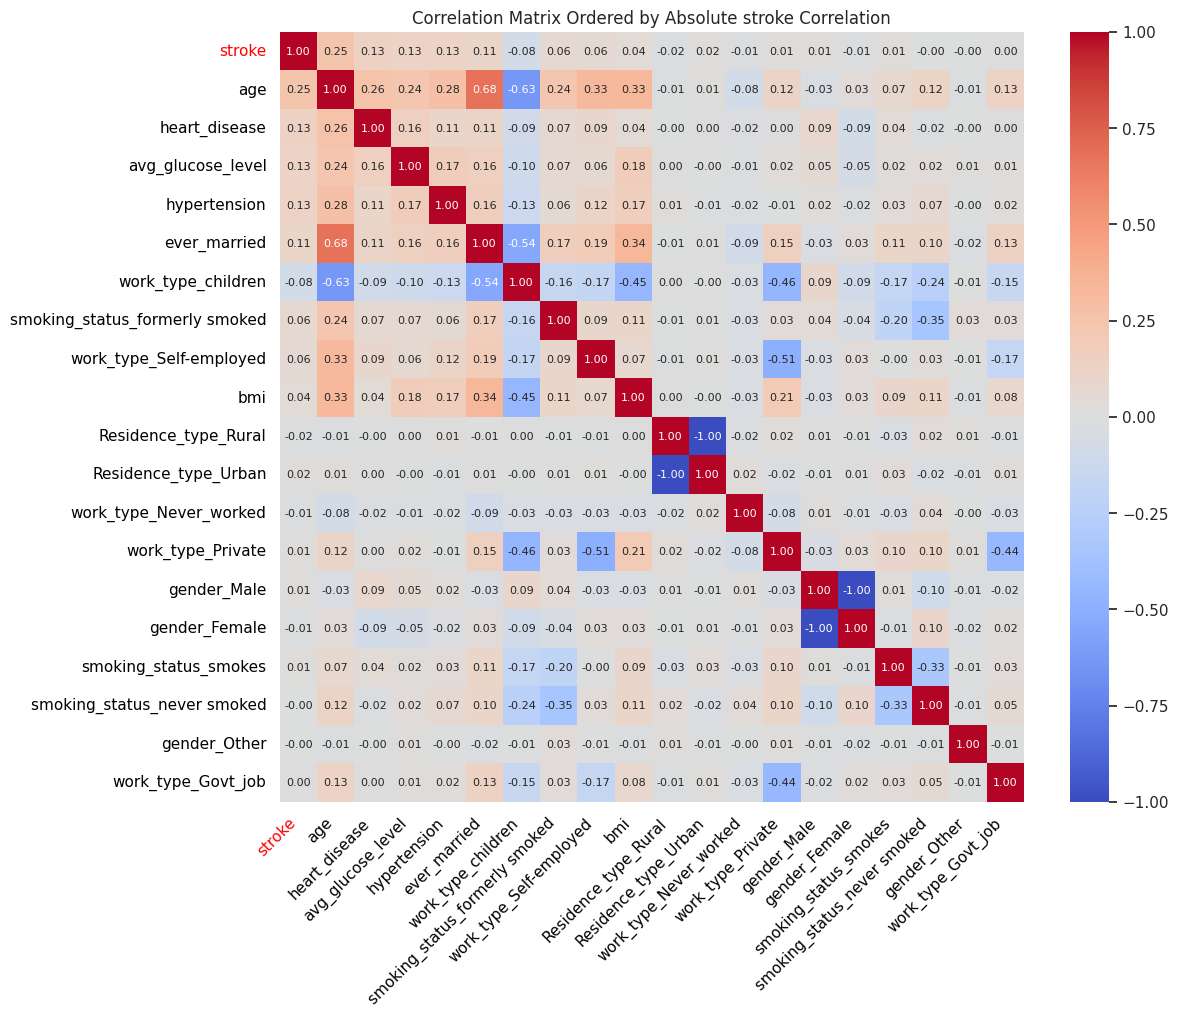

In [12]:
visual.plot_sorted_correlation(df, target_col='stroke')

In [13]:
# train sklearn models to predict stroke
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve

# split data into train and test
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['age', 'avg_glucose_level', 'bmi']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# one hot encode categorical features

